# TP2 – Analyse en composantes principales, classification et reconstruction
Sharaine MALARVIJY 21206543
## I. Chargement et mise en forme des données

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from display import plotHistoClasses, plotGallery
import time as t

import sklearn.model_selection as sk
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

[X, y, name]=np.load('TP2.npy', allow_pickle=True)

X_train, X_test, y_train, y_test = sk.train_test_split(X, y, random_state=543)


print("Nombre d’images X_train :", X_train.shape[0])
print("Nombre d’images X_test :", X_test.shape[0])
print("")
print("Dimensions X_train :", X_train.shape)
print("Dimensions X_test :", X_test.shape)


X_train = X_train.reshape(X_train.shape[0], 2914)
X_test = X_test.reshape(X_test.shape[0], 2914)

print("Dimensions X_train redimensionner :", X_train.shape)
print("Dimensions X_test redimensionner :", X_test.shape)

Nombre d’images X_train : 966
Nombre d’images X_test : 322

Dimensions X_train : (966, 62, 47)
Dimensions X_test : (322, 62, 47)
Dimensions X_train redimensionner : (966, 2914)
Dimensions X_test redimensionner : (322, 2914)


## II. Analyse en composantes principales et classification

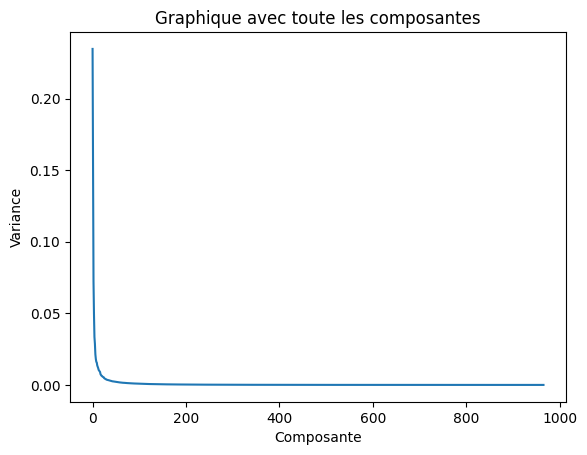

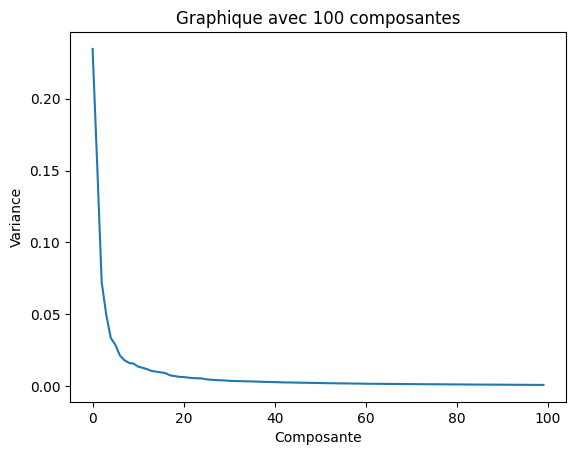


Dimensions X_train1 : (966, 100)
Dimensions X_test1 : (322, 100)
Donnée sans PCA
Le taux de reconnaissance pour 5PPV est 63.4 %
Durée de classification 1.42739 seconde

Donnée avec PCA
Le taux de reconnaissance pour 5PPV est 66.5 %
Durée de classification 0.04947 seconde


In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb_point = X_train.shape[0]

model = PCA(n_components=nb_point)
model.fit(X_train)
x = np.linspace(0, nb_point-1, nb_point)
plt.plot(x, model.explained_variance_ratio_)
plt.xlabel("Composante")
plt.ylabel("Variance")
plt.title("Graphique avec toute les composantes")
plt.show()

nb_point = 100

model = PCA(n_components=nb_point)
model.fit(X_train)
x = np.linspace(0, nb_point-1, nb_point)
plt.plot(x, model.explained_variance_ratio_)
plt.xlabel("Composante")
plt.ylabel("Variance")
plt.title("Graphique avec 100 composantes")
plt.show()

X_train1 = model.transform(X_train)
X_test1 = model.transform(X_test)

print("")
print("Dimensions X_train1 :", X_train1.shape)
print("Dimensions X_test1 :", X_test1.shape)

def KPPV(K, X_train, y_train, X_test):
    KPPV = KNeighborsClassifier(n_neighbors=K, metric='manhattan')
    KPPV.fit(X_train, y_train)
    prediction = KPPV.predict(X_test)
    return prediction

## Fonction faite par curiosité qui n'est pas demandé dans le TP
# def plot_accuracy(X_train, y_train, X_test, y_test, n=30):
#     list_prediction = []
#     nb_point = range(1, n)
#     for i in nb_point:
#         prediction = KPPV(i, X_train, y_train, X_test)
#         acc = accuracy_score(y_test, prediction)
#         list_prediction.append(acc)

#     plt.figure(figsize=(8,6))
#     plt.plot(nb_point, list_prediction, marker="o")
#     plt.xlabel("Nombre de voisins (K)")
#     plt.ylabel("Accuracy")
#     plt.title("Évolution de l'accuracy en fonction de K")
#     plt.grid(True)
#     plt.show()
# plot_accuracy(X_train1, y_train, X_test1, y_test)

tps1 = t.time()
prediction = KPPV(5, X_train, y_train, X_test)
tps2 = t.time()
prediction1 = KPPV(5, X_train1, y_train, X_test1)
tps3 = t.time()

print("Donnée sans PCA")
print("Le taux de reconnaissance pour 5PPV est", round(accuracy_score(y_test, prediction)*100, 1), "%")
print("Durée de classification", round(tps2-tps1, 5),"seconde")
print("")
print("Donnée avec PCA")
print("Le taux de reconnaissance pour 5PPV est", round(accuracy_score(y_test, prediction1)*100,1), "%")
print("Durée de classification", round(tps3-tps2, 5), 'seconde')


Les valeurs renvoyées par pca.explained_variance_ratio_ sont les ratios de la variance expliquée sur la variance totale pour chaque composante

Le temps de calcul diminue car on réduit le nombre de dimension.
Le taux de reconnaissance augmente car avoir un grand nombre de dimension peut detrimentiel pour la classification (malédiction des grandes dimensions)   
De plus on garde les informations les plus importante.



## III. Analyse en composantes principales et reconstruction

Dans l'ACP on changer le système d’axe de manière à ce que le maximum d'information soit contenu sur les premiers axes
Les vecteurs propres représente le nouvelle axe
Taille des vecteurs propre : (50, 62, 47)
Taux de compression de 1.72% pour 50 composante gardé


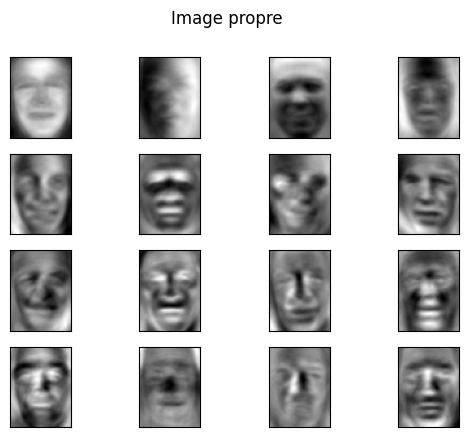

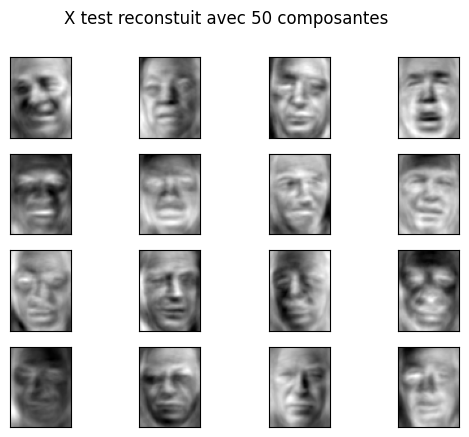

In [18]:
def compression_decomp(X_train, X_test, nb_point = 50):
    model = PCA(n_components=nb_point)
    X_train_comp = model.fit_transform(X_train)
    X_test_comp = model.transform(X_test)
    vecteur_propre = model.components_
    vecteur_propre = vecteur_propre.reshape(nb_point, 62, 47)
    
    X_test_reconst = model.inverse_transform(X_test_comp)
    X_test_reconst = X_test_reconst.reshape(X_test_reconst.shape[0], 62, 47)

    return vecteur_propre, X_test_comp, X_test_reconst

vecteur_propre, X_test_comp, X_test_reconst = compression_decomp(X_train, X_test)

print("Dans l'ACP on changer le système d’axe de manière à ce que le maximum d'information soit contenu sur les premiers axes")
print("Les vecteurs propres représente le nouvelle axe")
print(f"Taille des vecteurs propre : {vecteur_propre.shape}")

taux_compression = round((X_test_comp.size)/(X_test.size)*100, 2)
print(f"Taux de compression de {taux_compression}% pour 50 composante gardé")


plotGallery(vecteur_propre, title="Image propre")
plotGallery(X_test_reconst, title="X test reconstuit avec 50 composantes")

X_test_reconst a la même taille que X_test car l'image a été reconstruite

On projette les données compressées dans l’espace des vecteurs propres, puis on revient à l’espace original 

On passe de X_test_comp à X_test_reconst grâce à inverse_transform

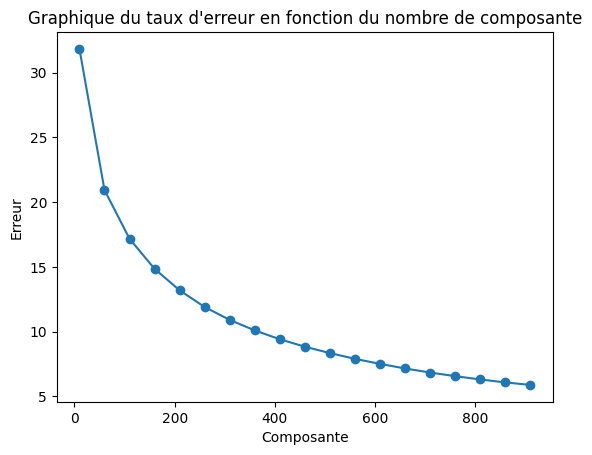

In [19]:
x = list(range(10, 950, 50))

list_E= []
for i in x:
    vecteur_propre, X_test_comp, X_test_reconst = compression_decomp(X_train, X_test, i)

    X_test_reconst = X_test_reconst.reshape(X_test_reconst.shape[0], 62*47)

    E = (X_test_reconst - X_test)**2
    E = np.mean(np.sqrt(np.sum(E,axis=1)))
    list_E.append(E)
    
plt.figure()
plt.plot(x, list_E, 'o-')
plt.xlabel("Composante")
plt.ylabel("Erreur")
plt.title("Graphique du taux d'erreur en fonction du nombre de composante")
plt.show()

On peut voir que le taux d'erreur diminue très rapidement par rapport au nombre de composante gardée

Si on gardait toutes les composantes on aurait une erreur de reconstruction de 0%

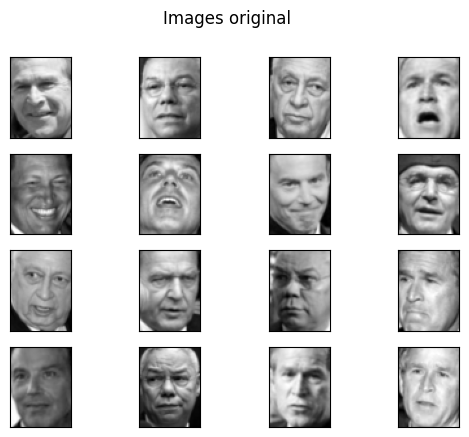

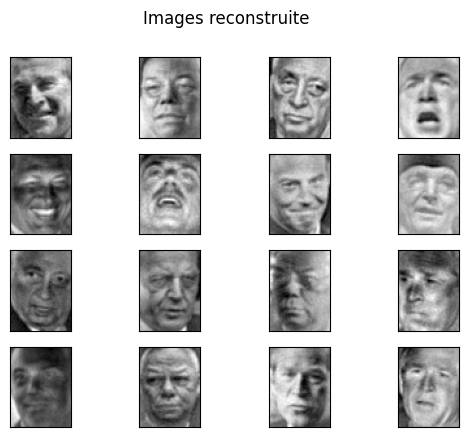

On reconnait bien tout les visages malgré quelques défauts parce que l'on a un taux de compression de 31.23%


In [21]:
_, X_test, _, _ = sk.train_test_split(X, y, random_state=543)
X_test_reconst = X_test_reconst.reshape(X_test_reconst.shape[0], 62, 47)

plotGallery(X_test, title="Images original")
plotGallery(X_test_reconst, title="Images reconstruite")

taux_compression = round((X_test_comp.size)/(X_test.size)*100, 2)
print(f"On reconnait bien tout les visages malgré quelques défauts parce que l'on a un taux de compression de {taux_compression}%")